# UJM - Master DSC/MLDM - Deep Learning - TP1b - Images

## Objectives

In this practical session, we will deal with images and try to reproduce results on the famous MNIST Dataset

### Part 1 - Pytorch and MNIST basic

Importing Torch and MNIST

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
# converting PIL to tensor already divides by 255

trainset = torchvision.datasets.MNIST('./data', download=True, train=True, transform=transform)
testset = torchvision.datasets.MNIST('./', download=True, train=False, transform=transform)

**Note** MNIST contains handwriting data of 10 numbers; each image has size 28 * 28. We display some examples below

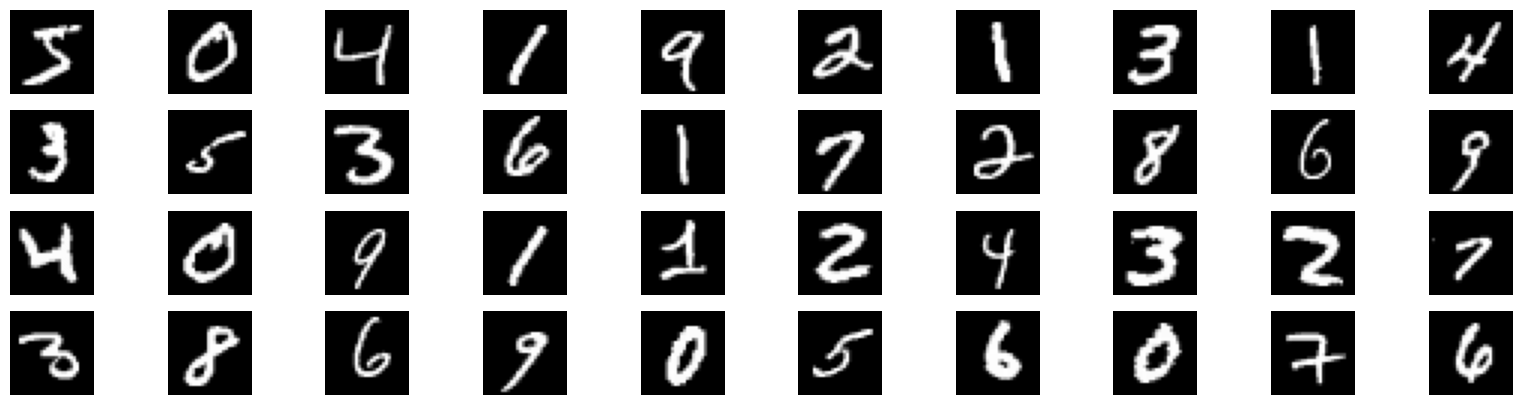

labels:  tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6])


c:\Users\USER\Documents\MLDM\M2_materials\Advanced_ML\myenv\Lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = trainset.data[i].numpy().squeeze()
    plt.imshow(example, cmap = 'gray')
    plt.axis('off')
plt.show()
print('labels: ', trainset.train_labels[:40])

**Note** We are skipping the data normalizing which is present
in the keras version of this session as the data loaded from the torch
is already normalized for our requirement.

- Now we load the data into a dataloader

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

**Note** now we display two images

## Let's start with fully connected neural networks (NN)
They are also called multi layered perceptrons (MLP).

In that case, the sequential model of torch is used mainly because its more simple (for a discusion on several pytorch modes see for instance https://github.com/FrancescoSaverioZuppichini/Pytorch-how-and-when-to-use-Module-Sequential-ModuleList-and-ModuleDict).

MLP have fully connected layers called `Linear` in pytorch (https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

In [5]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 300),
    torch.nn.Tanh(),
    torch.nn.Linear(300, 10),
    torch.nn.Softmax(1)
)

from torchsummary import summary
print(model) # If you don't need all the details you can just print the model to see a summary

summary(model, (1, 28, 28))

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=300, bias=True)
  (2): Tanh()
  (3): Linear(in_features=300, out_features=10, bias=True)
  (4): Softmax(dim=1)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
              Tanh-3                  [-1, 300]               0
            Linear-4                   [-1, 10]           3,010
           Softmax-5                   [-1, 10]               0
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.91
Estimated Total Size (MB): 0.92
----------------------------------------------------------------


**Next step**
Now we are going to define the train function and train the NN.
The first step here is to define the loss funtion (the loss) and the learning algorithm.
A natural choice for the loss is the `categorical_crossentropy` well suited for multiclass classification.
As a learning algorithm, let's began with the simple stochastic gradient descent optimizer, with default parameter initialization (that is a learning rate set at $0.01$).
The second step consist in fitting the NN to the data.
By setting the `verbose` parameter to 0 (no outputs during training), the computing time is significantly reduced.
This training phase may take about one minute.

In [6]:
# Using Adam optimizer to optimize weights of the Neural Network

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

def train(epochs):
  for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        # zero the parameter gradients
        inputs, labels = data
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.view(-1, 784))
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

  print('Finished Training')


In [7]:
train(10)

[1,    10] loss: 2.303
[1,    20] loss: 2.303
[1,    30] loss: 2.303
[1,    40] loss: 2.302
[1,    50] loss: 2.302
[1,    60] loss: 2.301
[1,    70] loss: 2.301
[1,    80] loss: 2.300
[1,    90] loss: 2.299
[1,   100] loss: 2.299
[1,   110] loss: 2.298
[1,   120] loss: 2.298
[1,   130] loss: 2.297
[1,   140] loss: 2.297
[1,   150] loss: 2.297
[1,   160] loss: 2.296
[1,   170] loss: 2.296
[1,   180] loss: 2.294
[1,   190] loss: 2.293
[1,   200] loss: 2.292
[1,   210] loss: 2.293
[1,   220] loss: 2.291
[1,   230] loss: 2.289
[1,   240] loss: 2.291
[1,   250] loss: 2.290
[1,   260] loss: 2.289
[1,   270] loss: 2.288
[1,   280] loss: 2.288
[1,   290] loss: 2.288
[1,   300] loss: 2.286
[1,   310] loss: 2.286
[1,   320] loss: 2.287
[1,   330] loss: 2.284
[1,   340] loss: 2.284
[1,   350] loss: 2.282
[1,   360] loss: 2.281
[1,   370] loss: 2.280
[1,   380] loss: 2.280
[1,   390] loss: 2.279
[1,   400] loss: 2.278
[1,   410] loss: 2.280
[1,   420] loss: 2.276
[1,   430] loss: 2.279
[1,   440] 

**Next** The quality of this NN is determined by measuring its error rate on the test set.

So we will define the function to get test accuray and run it.

In [8]:
# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():

    model.eval()
    accuracy = 0.0
    total = 0.0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = model(images.view(-1, 784))
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()

    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)

In [9]:
testAccuracy()

89.45

**Question** Try to retrain the same model but by replacing the 'tanh' activation by a 'relu' activation, what happens?

In [10]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 10),
    torch.nn.Softmax(1)
)

from torchsummary import summary
print(model) 
summary(model, (1, 28, 28))

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=300, bias=True)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=10, bias=True)
  (4): Softmax(dim=1)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
              ReLU-3                  [-1, 300]               0
            Linear-4                   [-1, 10]           3,010
           Softmax-5                   [-1, 10]               0
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.91
Estimated Total Size (MB): 0.92
----------------------------------------------------------------


In [13]:
# Same optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [14]:
train(10)
print('Finished Training')

[1,    10] loss: 2.302
[1,    20] loss: 2.302
[1,    30] loss: 2.301
[1,    40] loss: 2.301
[1,    50] loss: 2.301
[1,    60] loss: 2.301
[1,    70] loss: 2.301
[1,    80] loss: 2.300
[1,    90] loss: 2.300
[1,   100] loss: 2.300
[1,   110] loss: 2.300
[1,   120] loss: 2.300
[1,   130] loss: 2.299
[1,   140] loss: 2.299
[1,   150] loss: 2.299
[1,   160] loss: 2.299
[1,   170] loss: 2.299
[1,   180] loss: 2.298
[1,   190] loss: 2.297
[1,   200] loss: 2.298
[1,   210] loss: 2.298
[1,   220] loss: 2.297
[1,   230] loss: 2.297
[1,   240] loss: 2.296
[1,   250] loss: 2.296
[1,   260] loss: 2.296
[1,   270] loss: 2.296
[1,   280] loss: 2.295
[1,   290] loss: 2.295
[1,   300] loss: 2.295
[1,   310] loss: 2.295
[1,   320] loss: 2.294
[1,   330] loss: 2.294
[1,   340] loss: 2.293
[1,   350] loss: 2.294
[1,   360] loss: 2.292
[1,   370] loss: 2.292
[1,   380] loss: 2.293
[1,   390] loss: 2.292
[1,   400] loss: 2.291
[1,   410] loss: 2.291
[1,   420] loss: 2.291
[1,   430] loss: 2.291
[1,   440] 

**Note** if you fit again the model may continue to train

If you want to display the result every 10 epochs, you could use the following kind of loops
```
for i in range(5):
    model.fit(X_train, y_train, epochs=10, batch_size=64,verbose=0)
    _, train_acc = model.evaluate(X_train, y_train, batch_size=64)
    _, test_acc = model.evaluate(X_test, y_test, batch_size=64)
    print('training_accuracy, epoch number ', i*10+ 10,' : ', train_acc)
    print('testing_accuracy, epoch number ', i*10+ 10,' : ', test_acc,'\n')
```

**Question**
Use this procedure to compare the behavior of different optimizers available on Keras, check this page
<https://keras.io/api/optimizers/>
Try to compare the behavior of: SGD, RMSprop, Adam, Adadelta, Adagrad
Have a look to the available parameters

### Second try
Ok, let's improve our training a little bit by introduicing some punch in our optimizer.
To do so we add a momentum term (`momentum=0.9`) and some L2 penalty (`decay=1e-6`). This is done by  replacing the instruction `optimizer = torch.optim.SGD(model.parameters(), lr=0.01),`  by  `optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay = 1e-6, momentum = 0.9, nesterov = False), `
 and resume training in the same way as we just did (it may take about one minute).

In [15]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 300),
    torch.nn.Tanh(),
    torch.nn.Linear(300, 10),
    torch.nn.Softmax(1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay = 1e-6, momentum = 0.9, nesterov = False)
loss_fn = torch.nn.CrossEntropyLoss()

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
              Tanh-3                  [-1, 300]               0
            Linear-4                   [-1, 10]           3,010
           Softmax-5                   [-1, 10]               0
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.91
Estimated Total Size (MB): 0.92
----------------------------------------------------------------


In [16]:
train(1)

[1,    10] loss: 2.303
[1,    20] loss: 2.300
[1,    30] loss: 2.295
[1,    40] loss: 2.289
[1,    50] loss: 2.284
[1,    60] loss: 2.278
[1,    70] loss: 2.270
[1,    80] loss: 2.260
[1,    90] loss: 2.245
[1,   100] loss: 2.235
[1,   110] loss: 2.219
[1,   120] loss: 2.205
[1,   130] loss: 2.175
[1,   140] loss: 2.165
[1,   150] loss: 2.132
[1,   160] loss: 2.099
[1,   170] loss: 2.074
[1,   180] loss: 2.027
[1,   190] loss: 2.023
[1,   200] loss: 1.995
[1,   210] loss: 1.980
[1,   220] loss: 1.955
[1,   230] loss: 1.937
[1,   240] loss: 1.910
[1,   250] loss: 1.925
[1,   260] loss: 1.895
[1,   270] loss: 1.879
[1,   280] loss: 1.873
[1,   290] loss: 1.858
[1,   300] loss: 1.867
[1,   310] loss: 1.810
[1,   320] loss: 1.812
[1,   330] loss: 1.797
[1,   340] loss: 1.787
[1,   350] loss: 1.784
[1,   360] loss: 1.780
[1,   370] loss: 1.796
[1,   380] loss: 1.772
[1,   390] loss: 1.749
[1,   400] loss: 1.743
[1,   410] loss: 1.751
[1,   420] loss: 1.745
[1,   430] loss: 1.740
[1,   440] 

**Next** We evaluate

In [17]:
testAccuracy()

88.97

### Third try

There is still room for some improvement. Let's try the same architecture with another optimizer.
Try the `Adadelta` optimizer with default parameters(it may take about one minute).
To do so, replace the instruction  `optimizer=ttorch.optim.SGD(model.parameters(), lr=0.01, weight_decay = 1e-6, momentum = 0.9, nesterov = False),` by  `optimizer=torch.optim.Adadelta(model.parameters(), lr=0.01), `

We retrain the model and evaluate

In [18]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 300),
    torch.nn.Tanh(),
    torch.nn.Linear(300, 10),
    torch.nn.Softmax()
)

optimizer = torch.optim.Adadelta(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(50)
testAccuracy()

c:\Users\USER\Documents\MLDM\M2_materials\Advanced_ML\myenv\Lib\site-packages\torch\nn\modules\module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[1,    10] loss: 2.303
[1,    20] loss: 2.303
[1,    30] loss: 2.302
[1,    40] loss: 2.301
[1,    50] loss: 2.301
[1,    60] loss: 2.301
[1,    70] loss: 2.300
[1,    80] loss: 2.300
[1,    90] loss: 2.300
[1,   100] loss: 2.299
[1,   110] loss: 2.299
[1,   120] loss: 2.297
[1,   130] loss: 2.298
[1,   140] loss: 2.297
[1,   150] loss: 2.296
[1,   160] loss: 2.295
[1,   170] loss: 2.296
[1,   180] loss: 2.295
[1,   190] loss: 2.293
[1,   200] loss: 2.294
[1,   210] loss: 2.293
[1,   220] loss: 2.293
[1,   230] loss: 2.293
[1,   240] loss: 2.292
[1,   250] loss: 2.291
[1,   260] loss: 2.291
[1,   270] loss: 2.292
[1,   280] loss: 2.289
[1,   290] loss: 2.290
[1,   300] loss: 2.289
[1,   310] loss: 2.287
[1,   320] loss: 2.287
[1,   330] loss: 2.288
[1,   340] loss: 2.286
[1,   350] loss: 2.286
[1,   360] loss: 2.285
[1,   370] loss: 2.284
[1,   380] loss: 2.282
[1,   390] loss: 2.282
[1,   400] loss: 2.282
[1,   410] loss: 2.282
[1,   420] loss: 2.282
[1,   430] loss: 2.279
[1,   440] 

92.2

### Fourth try

In the MNIST leaderboad, with a 3-layer NN, 500+300 HU, softmax, cross entropy, weight decay, Hinton, reproted in 2005 an error rate of 1.53%. For fun we can use a ReLU activation function. The training phase takes about 5 minutes.

We retrain and evaluate

In [20]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 500),
    torch.nn.ReLU(),
    torch.nn.Linear(500, 300),
    torch.nn.Tanh(),
    torch.nn.Linear(300, 10),
    torch.nn.Softmax()
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(50)
testAccuracy()


[1,    10] loss: 2.074
[1,    20] loss: 1.832
[1,    30] loss: 1.733
[1,    40] loss: 1.752
[1,    50] loss: 1.697
[1,    60] loss: 1.643
[1,    70] loss: 1.651
[1,    80] loss: 1.622
[1,    90] loss: 1.623
[1,   100] loss: 1.616
[1,   110] loss: 1.632
[1,   120] loss: 1.613
[1,   130] loss: 1.594
[1,   140] loss: 1.563
[1,   150] loss: 1.575
[1,   160] loss: 1.604
[1,   170] loss: 1.554
[1,   180] loss: 1.586
[1,   190] loss: 1.607
[1,   200] loss: 1.576
[1,   210] loss: 1.600
[1,   220] loss: 1.579
[1,   230] loss: 1.568
[1,   240] loss: 1.571
[1,   250] loss: 1.583
[1,   260] loss: 1.571
[1,   270] loss: 1.568
[1,   280] loss: 1.568
[1,   290] loss: 1.560
[1,   300] loss: 1.551
[1,   310] loss: 1.572
[1,   320] loss: 1.554
[1,   330] loss: 1.546
[1,   340] loss: 1.545
[1,   350] loss: 1.560
[1,   360] loss: 1.588
[1,   370] loss: 1.586
[1,   380] loss: 1.567
[1,   390] loss: 1.555
[1,   400] loss: 1.568
[1,   410] loss: 1.584
[1,   420] loss: 1.568
[1,   430] loss: 1.552
[1,   440] 

89.81

Key Insight 

Fully-connected networks fundamentally misunderstand image data by treating pixels as independent features, ignoring the crucial spatial relationships that define visual patterns. No amount of optimizer tuning or additional layers can overcome this architectural limitation—MLPs flatten the image structure that convolutional networks explicitly preserve. While optimizers like Adadelta can squeeze out minor improvements to 92%, the ceiling remains low because MLPs lack the inductive bias for translation invariance and hierarchical feature learning.

## Let's continue with Convolutional neural networks (CNN)

In the MNIST leaderboad, LeCun et al. 1998 reported with LeNet-5 an error rate of 0.95%.
LeNet-5 is a convolutional neural network.

<img src="https://www.jeremyjordan.me/content/images/2018/04/Screen-Shot-2018-04-16-at-11.34.51-AM.png" alt="MNIST data" width="360" height="270" border="5" />

Convolution used to process images are 2d convolutions taking tensors as input and output.
To fit into the first 2d convolutional layer, the input have to be recast as tensor of dimension $28 \times 28 \times 1$. This can be performed by using a reshape.

## First try with CNN
With a simplified version of LeNet-5 and with ReLU instead of hyperbolic tangent as activation function. It takes about 3 minutes.


In [21]:
CNN = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(6, 16, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Flatten(),
    torch.nn.Linear(256, 120),
    torch.nn.ReLU(),
    torch.nn.Linear(120, 84),
    torch.nn.ReLU(),
    torch.nn.Linear(84, 10),
    torch.nn.Softmax(1)
)

In [23]:
summary(CNN, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
              ReLU-2            [-1, 6, 24, 24]               0
         MaxPool2d-3            [-1, 6, 12, 12]               0
            Conv2d-4             [-1, 16, 8, 8]           2,416
              ReLU-5             [-1, 16, 8, 8]               0
         MaxPool2d-6             [-1, 16, 4, 4]               0
           Flatten-7                  [-1, 256]               0
            Linear-8                  [-1, 120]          30,840
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
          Softmax-13                   [-1, 10]               0
Total params: 44,426
Trainable params: 

In [24]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN.parameters(), eps=1e-07) #check the defaults, compare to Keras!

In [25]:
def train(epochs):
  for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        # zero the parameter gradients
        inputs, labels = data
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = CNN(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

  print('Finished Training')

train(1)

[1,    10] loss: 2.302
[1,    20] loss: 2.299
[1,    30] loss: 2.275
[1,    40] loss: 2.210
[1,    50] loss: 2.097
[1,    60] loss: 1.912
[1,    70] loss: 1.863
[1,    80] loss: 1.863
[1,    90] loss: 1.810
[1,   100] loss: 1.822
[1,   110] loss: 1.815
[1,   120] loss: 1.845
[1,   130] loss: 1.810
[1,   140] loss: 1.827
[1,   150] loss: 1.800
[1,   160] loss: 1.828
[1,   170] loss: 1.786
[1,   180] loss: 1.783
[1,   190] loss: 1.830
[1,   200] loss: 1.798
[1,   210] loss: 1.796
[1,   220] loss: 1.793
[1,   230] loss: 1.775
[1,   240] loss: 1.789
[1,   250] loss: 1.777
[1,   260] loss: 1.803
[1,   270] loss: 1.785
[1,   280] loss: 1.783
[1,   290] loss: 1.761
[1,   300] loss: 1.747
[1,   310] loss: 1.701
[1,   320] loss: 1.679
[1,   330] loss: 1.674
[1,   340] loss: 1.669
[1,   350] loss: 1.643
[1,   360] loss: 1.656
[1,   370] loss: 1.648
[1,   380] loss: 1.643
[1,   390] loss: 1.664
[1,   400] loss: 1.668
[1,   410] loss: 1.644
[1,   420] loss: 1.636
[1,   430] loss: 1.622
[1,   440] 

In [26]:
def testAccuracy():

    CNN.eval()
    accuracy = 0.0
    total = 0.0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = CNN(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()

    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)

testAccuracy()


86.22

## Second try
With a CNN slightly more complex

In [27]:
CNN = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 64, kernel_size=3),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Dropout(p=0.25),
    torch.nn.Flatten(),
    torch.nn.Linear(7744, 128),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(128, 10),
    torch.nn.Softmax(1),
)

In [28]:
summary(CNN, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
              ReLU-2           [-1, 32, 24, 24]               0
            Conv2d-3           [-1, 64, 22, 22]          18,496
              ReLU-4           [-1, 64, 22, 22]               0
         MaxPool2d-5           [-1, 64, 11, 11]               0
           Dropout-6           [-1, 64, 11, 11]               0
           Flatten-7                 [-1, 7744]               0
            Linear-8                  [-1, 128]         991,360
              ReLU-9                  [-1, 128]               0
          Dropout-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
          Softmax-12                   [-1, 10]               0
Total params: 1,011,978
Trainable params: 1,011,978
Non-trainable params: 0
---------------------------

**Next** we proceed to the training in the same way, using `Adam` as optimizer. It may take about 15 minutes.

In [30]:
train(10)
testAccuracy()

[1,    10] loss: 2.303
[1,    20] loss: 2.303
[1,    30] loss: 2.302
[1,    40] loss: 2.302
[1,    50] loss: 2.302
[1,    60] loss: 2.303
[1,    70] loss: 2.303
[1,    80] loss: 2.303
[1,    90] loss: 2.303
[1,   100] loss: 2.303
[1,   110] loss: 2.303
[1,   120] loss: 2.303
[1,   130] loss: 2.303
[1,   140] loss: 2.303
[1,   150] loss: 2.303
[1,   160] loss: 2.303
[1,   170] loss: 2.303
[1,   180] loss: 2.302
[1,   190] loss: 2.303
[1,   200] loss: 2.303
[1,   210] loss: 2.303
[1,   220] loss: 2.302
[1,   230] loss: 2.303
[1,   240] loss: 2.303
[1,   250] loss: 2.303
[1,   260] loss: 2.303
[1,   270] loss: 2.303
[1,   280] loss: 2.303
[1,   290] loss: 2.303
[1,   300] loss: 2.303
[1,   310] loss: 2.303
[1,   320] loss: 2.302
[1,   330] loss: 2.303
[1,   340] loss: 2.303
[1,   350] loss: 2.302
[1,   360] loss: 2.303
[1,   370] loss: 2.303
[1,   380] loss: 2.303
[1,   390] loss: 2.303
[1,   400] loss: 2.302
[1,   410] loss: 2.303
[1,   420] loss: 2.303
[1,   430] loss: 2.303
[1,   440] 

8.27

**Question** Can you improve these results by using other activation functions (e.g. 'relu')?

In [33]:
# utilzed LeakyRelu as it is a faster and more efficient activation function
from torch.nn import LeakyReLU

CNN = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=5),
    LeakyReLU(negative_slope=0.01),         # change activation
    torch.nn.Conv2d(32, 64, kernel_size=3),
    LeakyReLU(negative_slope=0.01),         # change activation
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Dropout(p=0.25),
    torch.nn.Flatten(),
    torch.nn.Linear(7744, 128),
    LeakyReLU(negative_slope=0.01),         # change activation
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(128, 10)                # no Softmax
)

optimizer = torch.optim.Adam(CNN.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

summary(CNN, (1, 28, 28))

train(10)
print("Test Accuracy:", testAccuracy())


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
         LeakyReLU-2           [-1, 32, 24, 24]               0
            Conv2d-3           [-1, 64, 22, 22]          18,496
         LeakyReLU-4           [-1, 64, 22, 22]               0
         MaxPool2d-5           [-1, 64, 11, 11]               0
           Dropout-6           [-1, 64, 11, 11]               0
           Flatten-7                 [-1, 7744]               0
            Linear-8                  [-1, 128]         991,360
         LeakyReLU-9                  [-1, 128]               0
          Dropout-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
Total params: 1,011,978
Trainable params: 1,011,978
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

In [ ]:
from torch.nn import Tanh

CNN = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=5),
    Tanh(),
    torch.nn.Conv2d(32, 64, kernel_size=3),
    Tanh(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Dropout(p=0.25),
    torch.nn.Flatten(),
    torch.nn.Linear(7744, 128),
    Tanh(),
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(128, 10)
)

train(10)
print("Test Accuracy:", testAccuracy())


[1,    10] loss: 2.303
[1,    20] loss: 2.310
[1,    30] loss: 2.310
[1,    40] loss: 2.311
[1,    50] loss: 2.307
[1,    60] loss: 2.308
[1,    70] loss: 2.308
[1,    80] loss: 2.308
[1,    90] loss: 2.310
[1,   100] loss: 2.313
[1,   110] loss: 2.306
[1,   120] loss: 2.307
[1,   130] loss: 2.310
[1,   140] loss: 2.308
[1,   150] loss: 2.302
[1,   160] loss: 2.311
[1,   170] loss: 2.307
[1,   180] loss: 2.314
[1,   190] loss: 2.321
[1,   200] loss: 2.319
[1,   210] loss: 2.312
[1,   220] loss: 2.311
[1,   230] loss: 2.312
[1,   240] loss: 2.309
[1,   250] loss: 2.311
[1,   260] loss: 2.307
[1,   270] loss: 2.309
[1,   280] loss: 2.310
[1,   290] loss: 2.304
[1,   300] loss: 2.307
[1,   310] loss: 2.304
[1,   320] loss: 2.314
[1,   330] loss: 2.306
[1,   340] loss: 2.310
[1,   350] loss: 2.309
[1,   360] loss: 2.301
[1,   370] loss: 2.308
[1,   380] loss: 2.312
[1,   390] loss: 2.309
[1,   400] loss: 2.307
[1,   410] loss: 2.308
[1,   420] loss: 2.307
[1,   430] loss: 2.308
[1,   440] 

**Question** Can you improve the results above with more complex architectures?

In [38]:
from torch.nn import ReLU, BatchNorm2d

CNN = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
    BatchNorm2d(32),
    ReLU(),
    
    torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
    BatchNorm2d(64),
    ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Dropout(0.25),

    torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),
    BatchNorm2d(128),
    ReLU(),
    
    torch.nn.Conv2d(128, 128, kernel_size=3, padding=1),
    BatchNorm2d(128),
    ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Dropout(0.25),

    torch.nn.Flatten(),
    torch.nn.Linear(128 * 7 * 7, 256),
    ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 10)
)

optimizer = torch.optim.Adam(CNN.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

summary(CNN, (1, 28, 28))

train(10)
print("Test Accuracy:", testAccuracy())


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          18,496
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
           Dropout-8           [-1, 64, 14, 14]               0
            Conv2d-9          [-1, 128, 14, 14]          73,856
      BatchNorm2d-10          [-1, 128, 14, 14]             256
             ReLU-11          [-1, 128, 14, 14]               0
           Conv2d-12          [-1, 128, 14, 14]         147,584
      BatchNorm2d-13          [-1, 128, 14, 14]             256
             ReLU-14          [-1, 128,

# Part 3 Other dataset

try to do your best with another version of this dataset: fashion_MNIST

100%|██████████| 26.4M/26.4M [00:10<00:00, 2.60MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 912kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.42MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


train data:	 torch.Size([60000, 28, 28])
test data:	 torch.Size([10000, 28, 28])


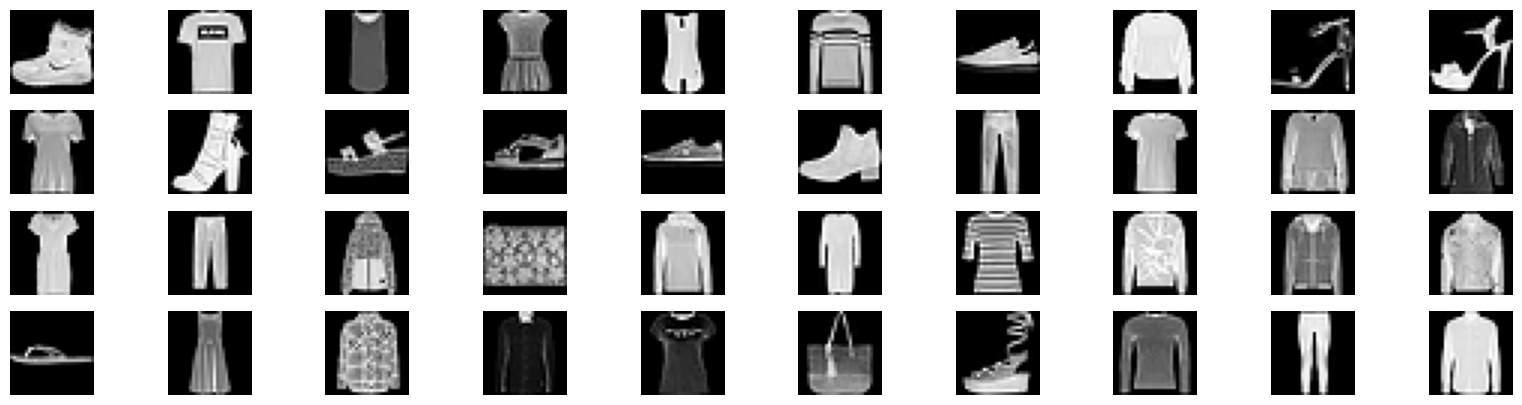

labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6])


c:\Users\USER\Documents\MLDM\M2_materials\Advanced_ML\myenv\Lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [39]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transform)
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=transform)

print('train data:\t', train_set.data.shape)
print('test data:\t', test_set.data.shape)

plt.figure(figsize=(20,5))

for i in range(40):
    plt.subplot(4, 10, i+1)
    example = train_set.data[i].numpy().squeeze()
    plt.imshow(example, cmap = 'gray')
    plt.axis('off')
plt.show()
print('labels: ', train_set.train_labels[:40])


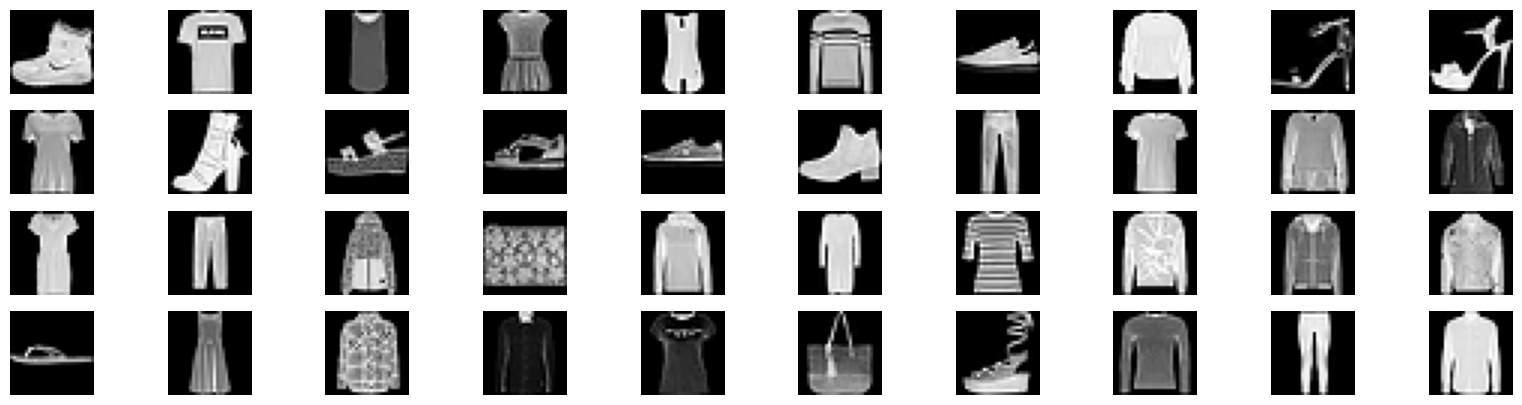

Train: torch.Size([60000, 28, 28])
Test: torch.Size([10000, 28, 28])


In [40]:
train_set = torchvision.datasets.FashionMNIST(
    "./data", download=True, transform=transform
)
test_set = torchvision.datasets.FashionMNIST(
    "./data", download=True, train=False, transform=transform
)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = train_set.data[i].numpy()
    plt.imshow(example, cmap='gray')
    plt.axis('off')
plt.show()

print("Train:", train_set.data.shape)
print("Test:", test_set.data.shape)


In [41]:
# MLP Baseline (same as MNIST MLP)
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 10)  # logits
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

train(10)
print("MLP Test Accuracy:", testAccuracy())


[1,    10] loss: 7.462
[1,    20] loss: 7.575
[1,    30] loss: 7.328
[1,    40] loss: 7.695
[1,    50] loss: 7.778
[1,    60] loss: 8.060
[1,    70] loss: 7.417
[1,    80] loss: 7.645
[1,    90] loss: 7.808
[1,   100] loss: 7.889
[1,   110] loss: 7.473
[1,   120] loss: 7.651
[1,   130] loss: 7.718
[1,   140] loss: 7.544
[1,   150] loss: 7.993
[1,   160] loss: 7.661
[1,   170] loss: 7.818
[1,   180] loss: 7.630
[1,   190] loss: 7.823
[1,   200] loss: 7.751
[1,   210] loss: 7.773
[1,   220] loss: 7.568
[1,   230] loss: 7.646
[1,   240] loss: 7.556
[1,   250] loss: 7.867
[1,   260] loss: 7.596
[1,   270] loss: 7.565
[1,   280] loss: 8.207
[1,   290] loss: 7.408
[1,   300] loss: 7.685
[1,   310] loss: 7.773
[1,   320] loss: 7.860
[1,   330] loss: 7.726
[1,   340] loss: 7.398
[1,   350] loss: 7.487
[1,   360] loss: 7.410
[1,   370] loss: 7.910
[1,   380] loss: 7.706
[1,   390] loss: 7.847
[1,   400] loss: 7.689
[1,   410] loss: 7.626
[1,   420] loss: 7.533
[1,   430] loss: 7.753
[1,   440] 

In [ ]:
# CNN training 
CNN = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(6, 16, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten(),
    torch.nn.Linear(256, 120),
    torch.nn.ReLU(),
    torch.nn.Linear(120, 84),
    torch.nn.ReLU(),
    torch.nn.Linear(84, 10)
)

optimizer = torch.optim.Adam(CNN.parameters(), lr=0.001)

train(10)
print("Basic CNN Test Accuracy:", testAccuracy())

[1,    10] loss: 2.292
[1,    20] loss: 2.210
[1,    30] loss: 1.935
[1,    40] loss: 1.485
[1,    50] loss: 1.160
[1,    60] loss: 1.005
[1,    70] loss: 1.021
[1,    80] loss: 0.925
[1,    90] loss: 0.956
[1,   100] loss: 0.886
[1,   110] loss: 0.888
[1,   120] loss: 0.761
[1,   130] loss: 0.836
[1,   140] loss: 0.839
[1,   150] loss: 0.790
[1,   160] loss: 0.801
[1,   170] loss: 0.771
[1,   180] loss: 0.706
[1,   190] loss: 0.654
[1,   200] loss: 0.712
[1,   210] loss: 0.699
[1,   220] loss: 0.710
[1,   230] loss: 0.691
[1,   240] loss: 0.707
[1,   250] loss: 0.703
[1,   260] loss: 0.699
[1,   270] loss: 0.665
[1,   280] loss: 0.675
[1,   290] loss: 0.730
[1,   300] loss: 0.639
[1,   310] loss: 0.641
[1,   320] loss: 0.654
[1,   330] loss: 0.582
[1,   340] loss: 0.624
[1,   350] loss: 0.674
[1,   360] loss: 0.644
[1,   370] loss: 0.599
[1,   380] loss: 0.631
[1,   390] loss: 0.687
[1,   400] loss: 0.583
[1,   410] loss: 0.584
[1,   420] loss: 0.688
[1,   430] loss: 0.657
[1,   440] 

**Bonus**
if you have time, you can try to addresse the CIFAR dataset

100%|██████████| 170M/170M [15:06<00:00, 188kB/s]     


train data:	 (50000, 32, 32, 3)
test data:	 (10000, 32, 32, 3)


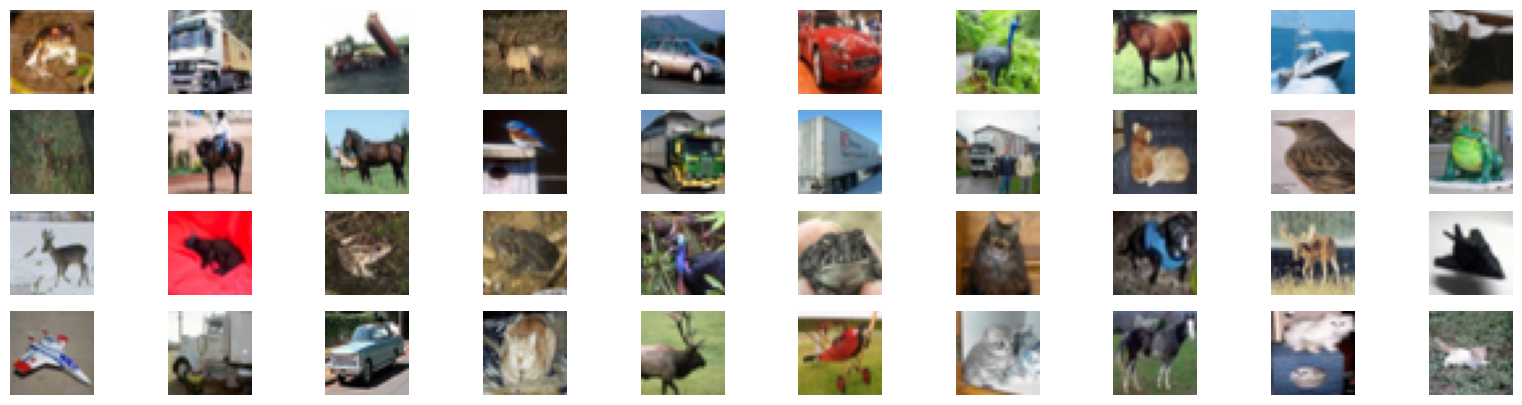

labels:  [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3]


In [44]:
train_set = torchvision.datasets.CIFAR10("./data", download=True, transform=
                                                transform)
test_set = torchvision.datasets.CIFAR10("./data", download=True, train=False, transform=transform)

print('train data:\t', train_set.data.shape)
print('test data:\t', test_set.data.shape)

plt.figure(figsize=(20,5))

for i in range(40):
    plt.subplot(4, 10, i+1)
    example = train_set.data[i]
    plt.imshow(example, cmap = 'gray')
    plt.axis('off')
plt.show()
print('labels: ', train_set.targets[:40])

In [48]:

# CIFAR10  with same CNN archtecture (3-channel input, 32x32)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# CNN for CIFAR10
CNN = torch.nn.Sequential(
    torch.nn.Conv2d(3, 32, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),  

    torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),

    torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),

    torch.nn.Flatten(),
    torch.nn.Linear(128 * 4 * 4, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

optimizer = torch.optim.Adam(CNN.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

summary(CNN, (3, 32, 32))

train(10)
print("CIFAR10 CNN Test Accuracy:", testAccuracy())


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 8, 8]          73,856
              ReLU-8            [-1, 128, 8, 8]               0
         MaxPool2d-9            [-1, 128, 4, 4]               0
          Flatten-10                 [-1, 2048]               0
           Linear-11                  [-1, 256]         524,544
             ReLU-12                  [-1, 256]               0
           Linear-13                   [-1, 10]           2,570
Total params: 620,362
Trainable params:

## Torch version

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

**Final Question** Write down the similarities and differences between torch and keras version of the notebooks below.

Both frameworks solved the same tasks: MLPs and CNNs on MNIST, Fashion-MNIST, and CIFAR-10. Training behavior, accuracy trends, and dataset difficulty matched: MLPs plateaued on images, deeper CNNs jumped to high accuracy, Fashion-MNIST was harder than MNIST, and CIFAR-10 needed deeper conv stacks to perform well. The learning curves and optimizer effects aligned across both; Adam accelerated convergence, momentum helped SGD, tanh slowed learning, and ReLU consistently won. The architectural changes produced comparable performance shifts in each environment, confirming the designs rather than the libraries drive the outcomes.

The workflows differed. PyTorch used manual training loops and explicit gradient steps, while Keras hid much of this under `fit()` and `compile()`. PyTorch expected raw logits before cross-entropy; Keras applied softmax at the output. Data pipelines also varied: PyTorch relied on `DataLoader` and torchvision transforms; Keras reshaped and fed arrays directly. PyTorch offered more granular control and transparency; Keras delivered faster prototyping with cleaner high-level abstractions. In both cases, core deep-learning principles held, and results stayed consistent once the activation, loss, and optimizer configurations were aligned.
